# Professor Bear :: Image Analysis :: Canny Edge Detector 

## Professor Bear github


Code for Professor Bear YouTube videos at https://github.com/nikbearbrown


## Download Anaconda 4 for Python 2.7

Download Anaconda 4 for  Python 2.7 version
[https://www.continuum.io/downloads](https://www.continuum.io/downloads)
    
Anaconda 4.3.0 includes an easy installation of Python (2.7.13, 3.4.5, 3.5.2, and/or 3.6.0) and updates of over 100 pre-built and tested scientific and analytic Python packages. These packages include NumPy, Pandas, SciPy, Matplotlib, and Jupyter. Over 620 more packages are available.    
[https://docs.continuum.io/anaconda/pkg-docs](https://docs.continuum.io/anaconda/pkg-docs)
        

## iPython

Go to the directory that has your iPython notebook

At the command line type

_jupyter notebook notebookname_

_ipython notebook notebookname_  will also work

For example,

jupyter notebook Professor_Bear_Image_Analysis_Loading_Histograms.ipynb



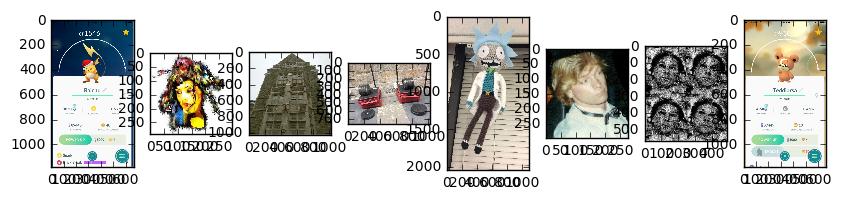

In [1]:
# Bring in python image analysis libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import color
import skimage.filters as filters
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage import feature
from skimage import morphology
from skimage.draw import circle_perimeter
from skimage import img_as_float, img_as_ubyte
from skimage import segmentation as seg
from skimage.morphology import watershed
from scipy import ndimage as nd
from scipy.ndimage import convolve
from skimage import feature
import glob # for bulk file import

# Set defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images in... grayscale.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour
plt.rcParams['figure.figsize'] = 10, 10

# Import test images
imgpaths = glob.glob("./img/*.jpg") + glob.glob("./img/*.png")
# imgpaths = glob.glob("images/*.jpg") + glob.glob("images/*.png")  Windows
# Windows has different relative paths than Mac/Unix
imgset = [mpimg.imread(x) for x in imgpaths]

# Display thumbnails of the images to ensure loading
plt.figure()
for i,img in enumerate(imgset):
    plt.subplot(1, len(imgset), i+1)
    plt.imshow(img, cmap = 'gray')

## Canny edge detector 

The Canny edge detector (from https://en.wikipedia.org/wiki/Canny_edge_detector)   is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. 
    
Canny edge detection algorithm  

1	Gaussian filter   
2	Finding the intensity gradient of the image   
3	Non-maximum suppression   
4	Double threshold    
5	Edge tracking by hysteresis  


1	Gaussian filter  
The idea is to smooth the image, to make it less susceptible to noise.   

2	Finding the intensity gradient of the image  

The Canny algorithm uses four filters to detect horizontal, vertical and diagonal edges in the blurred image.   

3	Non-maximum suppression   

Non-Maximum suppression is applied to "thin" the edge. The Gaussian filter blurs the edges.

The algorithm for each pixel in the gradient image is:
Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
If the edge strength of the current pixel is the largest compared to the other pixels in the mask with the same direction (i.e., the pixel that is pointing in the y direction, it will be compared to the pixel above and below it in the vertical axis), the value will be preserved. Otherwise, the value will be suppressed.   

4	Double threshold  

After application of non-maximum suppression, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. This is accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's value is smaller than the low threshold value, it will be suppressed. The two threshold values are empirically determined and their definition will depend on the content of a given input image.

5	Edge tracking by hysteresis   

The strong edge pixels should certainly be involved in the final edge image, as they are extracted from the true edges in the image. However, there will be some debate on the weak edge pixels, as these pixels can either be extracted from the true edge, or the noise/color variations. To achieve an accurate result, the weak edges caused by the latter reasons should be removed. Usually a weak edge pixel caused from true edges will be connected to a strong edge pixel while noise responses are unconnected. To track the edge connection, blob analysis is applied by looking at a weak edge pixel and its 8-connected neighborhood pixels. As long as there is one strong edge pixel that is involved in the blob, that weak edge point can be identified as one that should be preserved.

## Canny edge detector from skimage

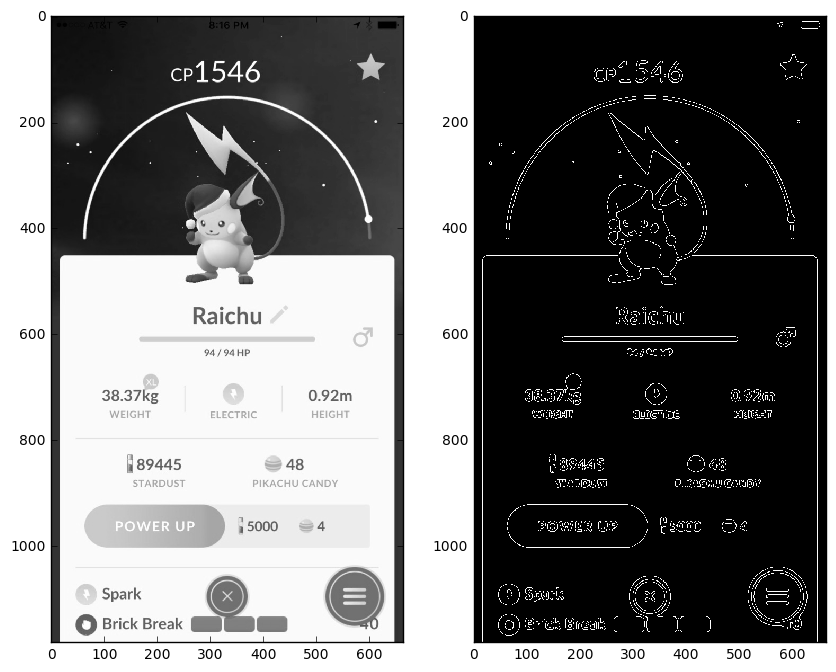

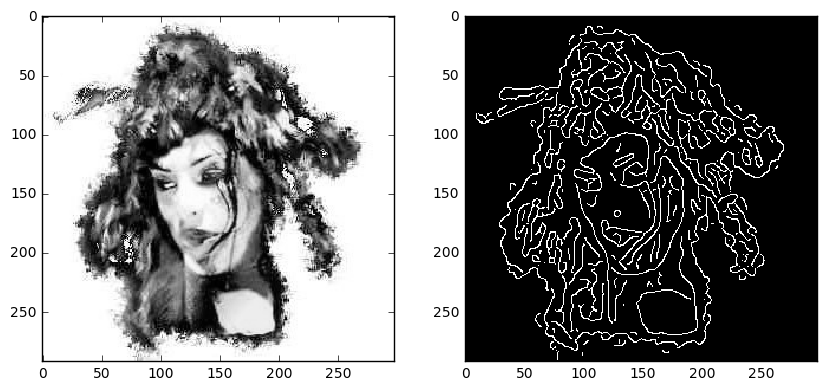

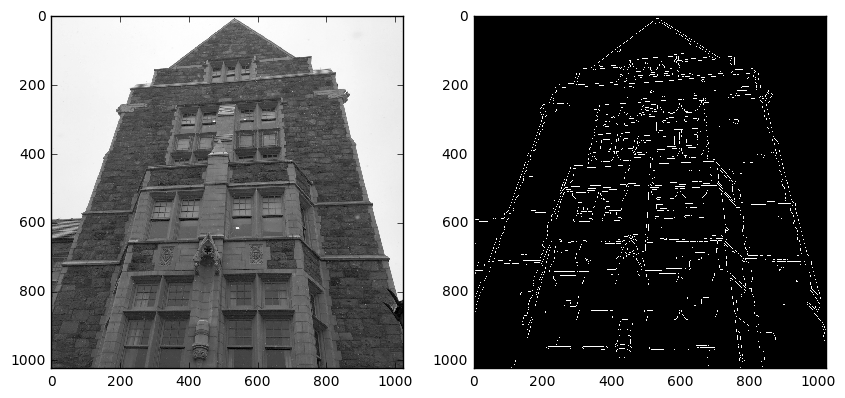

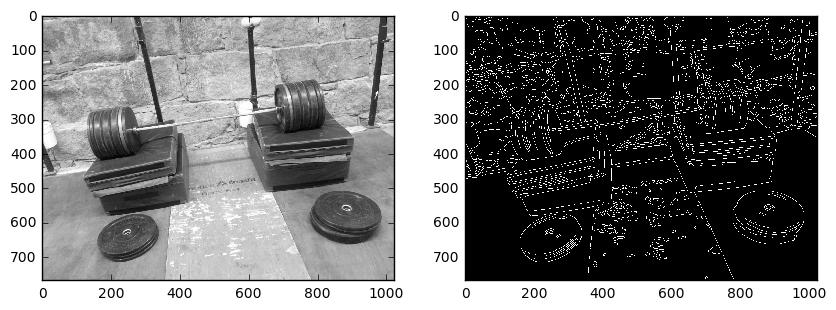

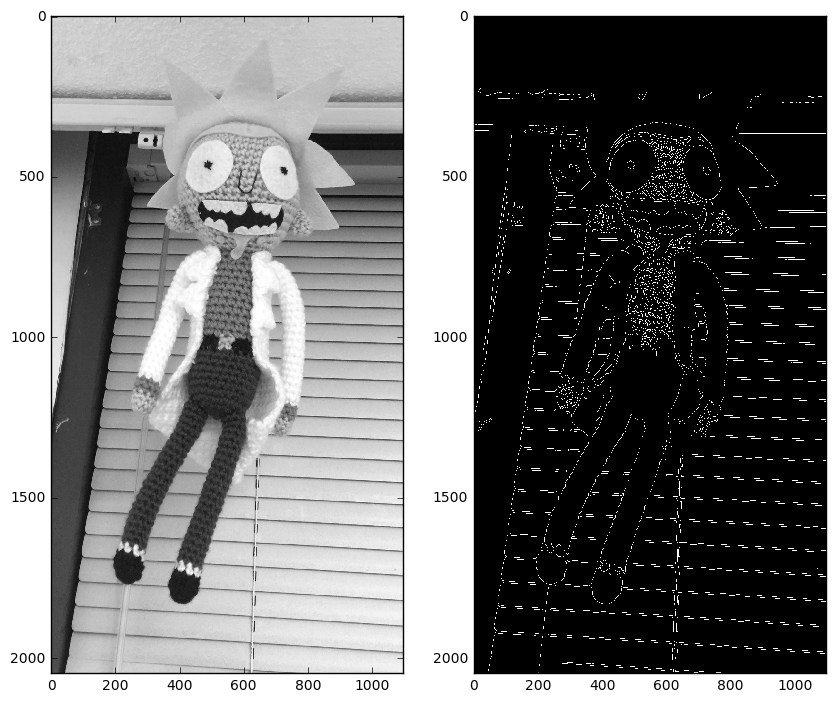

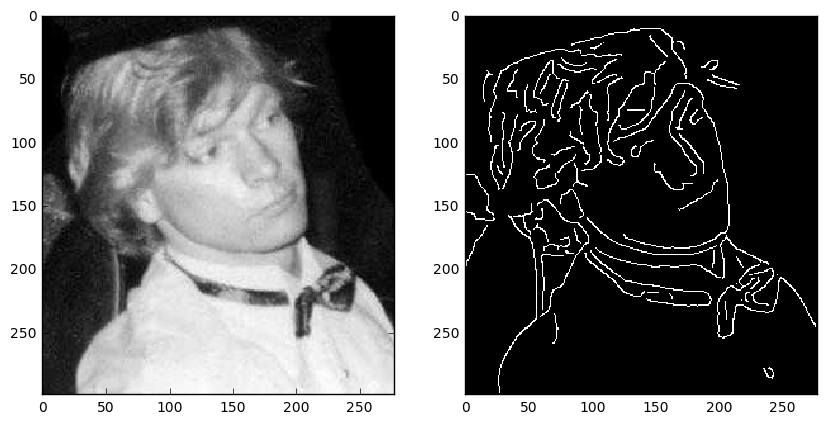

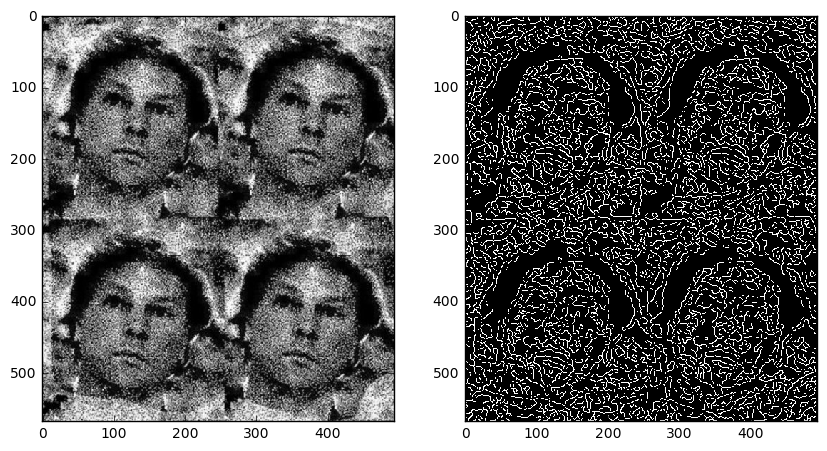

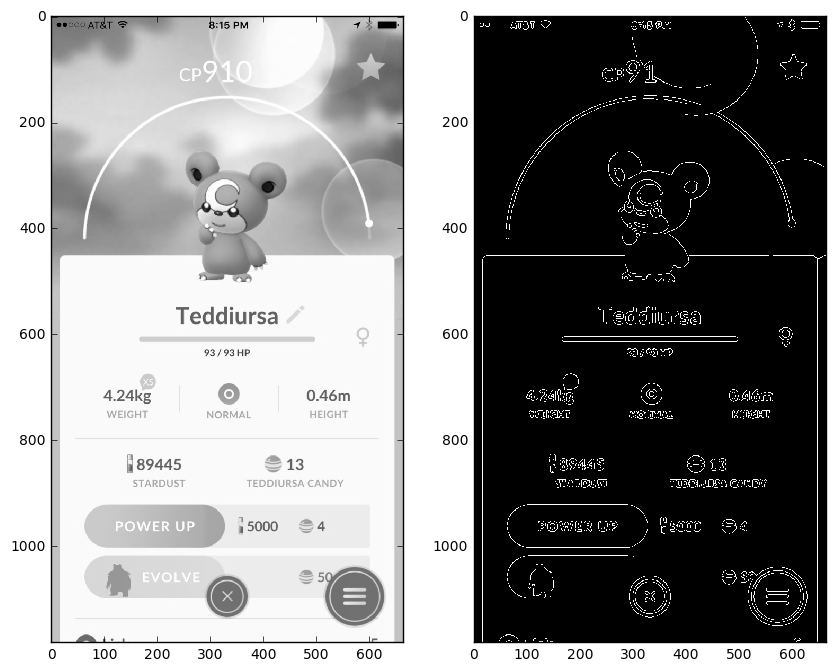

In [2]:
# Apply to image set
sigma = 2.0
for i,img in enumerate(imgset):
    imgbw = img_as_float(color.rgb2grey(img))
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(imgbw)
    plt.subplot(1, 2, 2)
    plt.imshow(feature.canny(imgbw, sigma))

## How susceptible is the Canny edge detector to image noise?

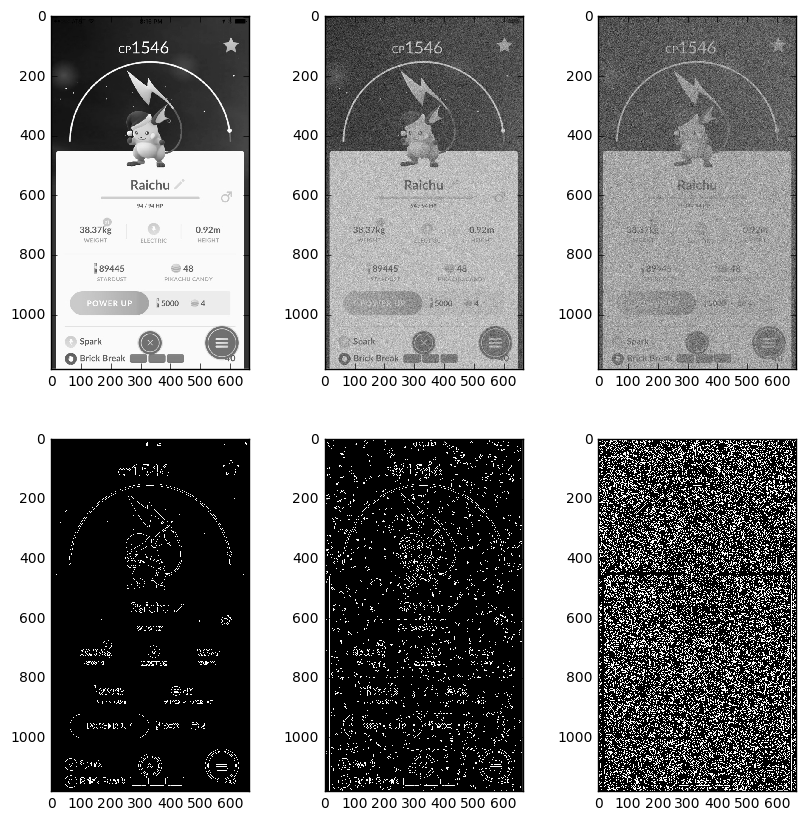

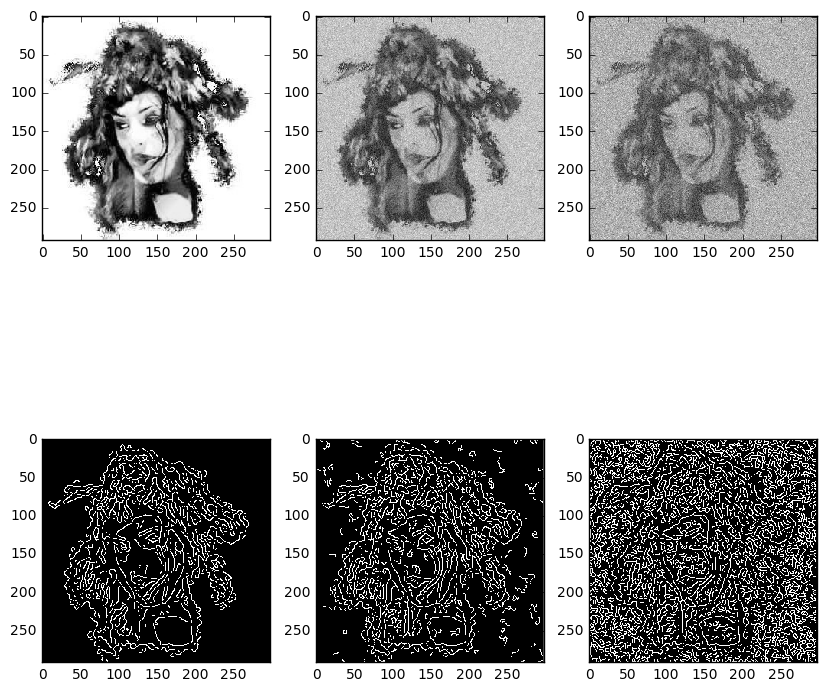

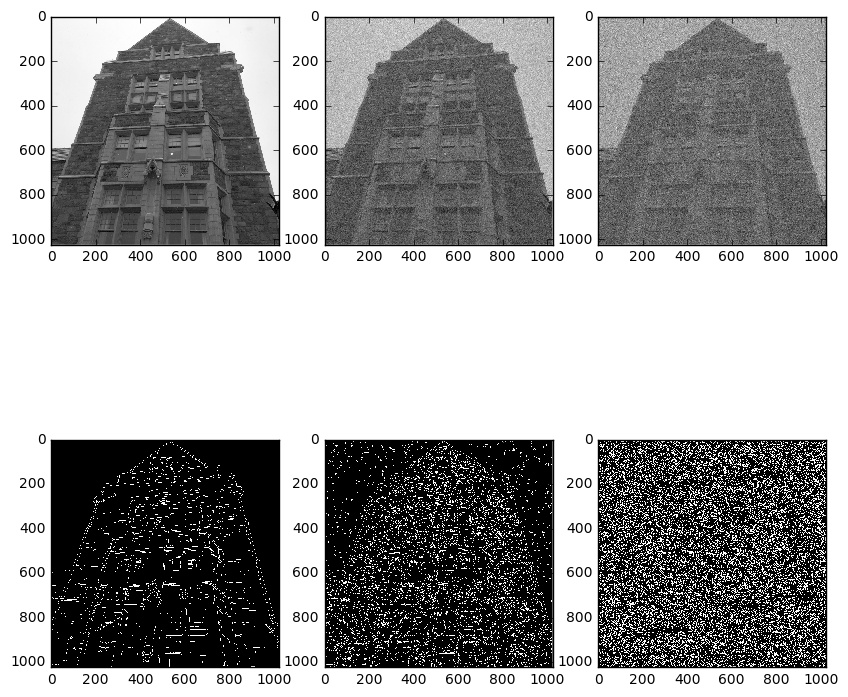

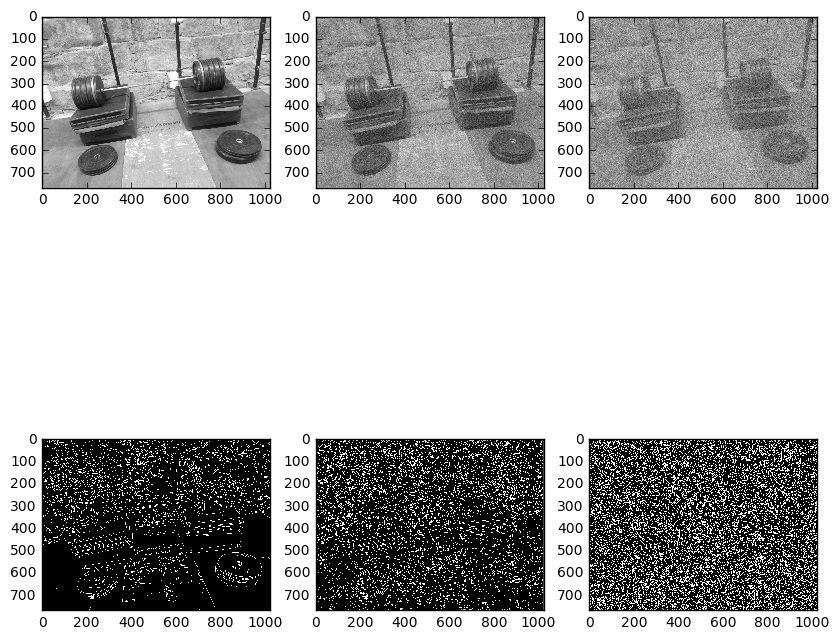

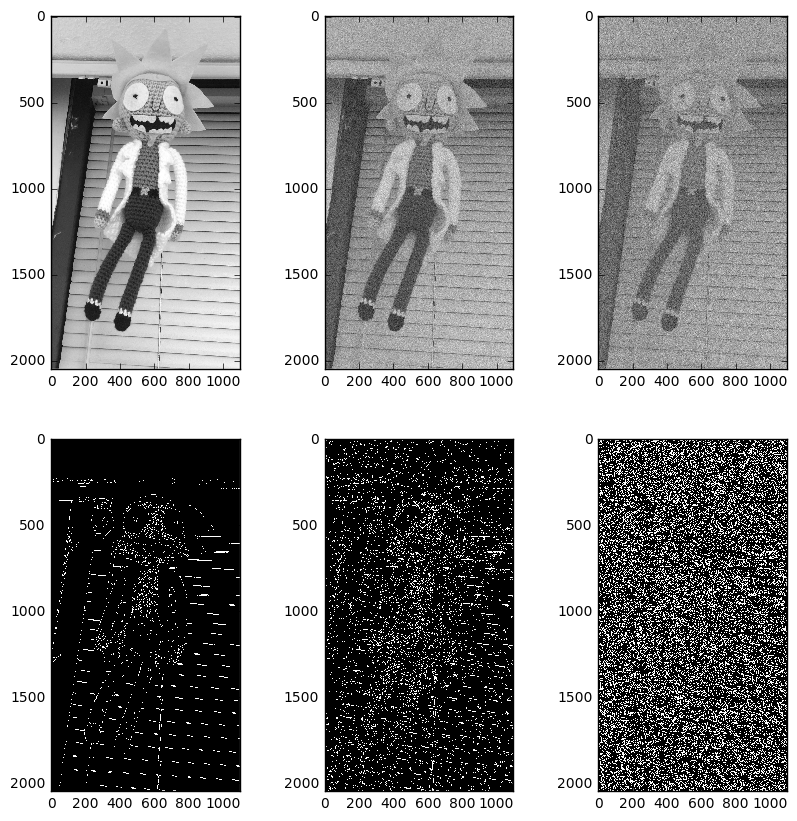

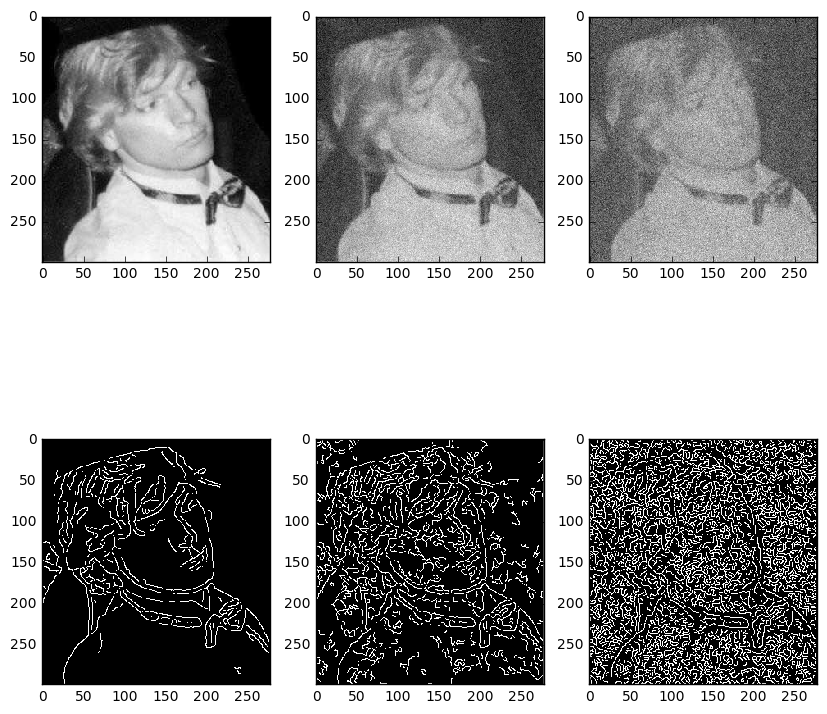

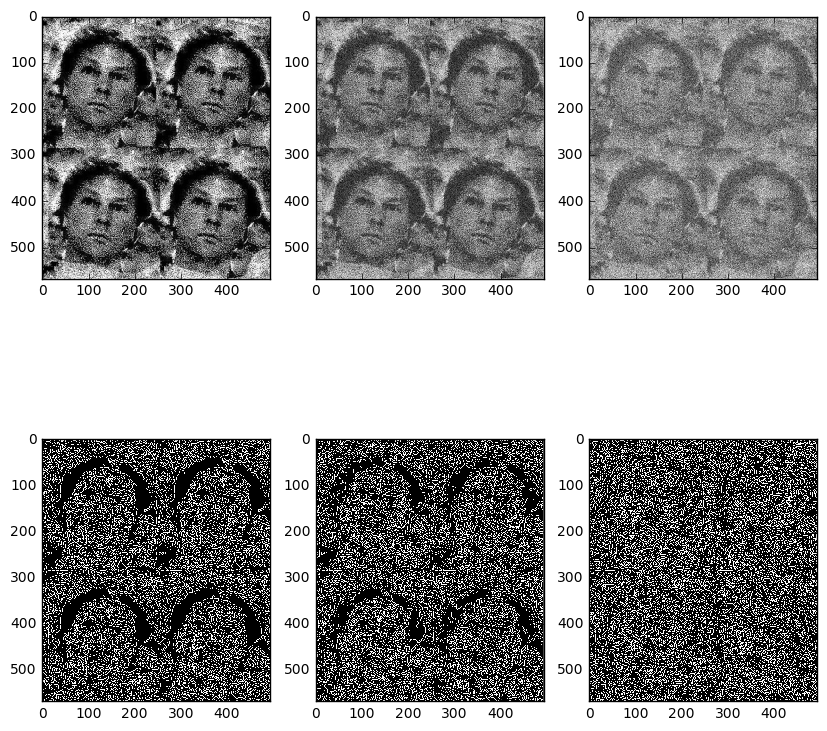

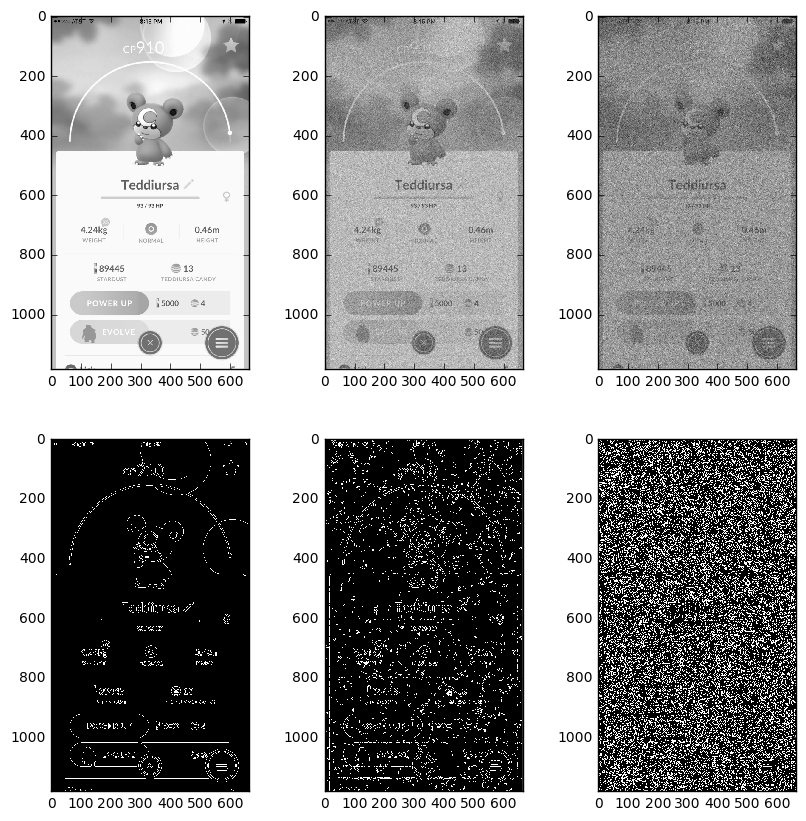

In [3]:
def add_noise(img, sigma=1.0):
    if sigma == 0:
        return img
    else:
        return img + np.random.normal(0, sigma, np.shape(img))

# Apply to test images
filter_sigma = 1.5
for i,img in enumerate(imgset):
    imgbw = img_as_float(color.rgb2grey(img)) 
    plt.figure()
    for j in range(3):
        noise_sigma = 0.0 + 0.1 * j
        plt.subplot(2, 3, j+1)
        noisy = add_noise(imgbw, noise_sigma)
        plt.imshow(noisy)
        plt.subplot(2, 3, j+4)
        plt.imshow(feature.canny(noisy, filter_sigma))

The Canny filter seems very susceptible to noise. It generates spurrious edges very quickly as noise is increased.

# Python Tutorials

Python 101 [Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html](Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html)

The Official Python Tutorial - [http://www.python.org/doc/current/tut/tut.html](http://www.python.org/doc/current/tut/tut.html() 

The Python Quick Reference -[http://rgruet.free.fr/PQR2.3.html](http://rgruet.free.fr/PQR2.3.html) 

YouTube Python Tutorials 

Google Python Class - [http://www.youtube.com/watch?v=tKTZoB2Vjuk](http://www.youtube.com/watch?v=tKTZoB2Vjuk) 
                                                                              
Python Fundamentals Training – Classes [http://www.youtube.com/watch?v=rKzZEtxIX14](http://www.youtube.com/watch?v=rKzZEtxIX14)

Python 2.7 Tutorial Derek Banas - [http://www.youtube.com/watch?v=UQi-L-_chcc](http://www.youtube.com/watch?v=UQi-L-_chcc)

Python Programming Tutorial thenewboston - [http://www.youtube.com/watch?v=4Mf0h3HphEA](http://www.youtube.com/watch?v=4Mf0h3HphEA)







# Evaluation

Install Anaconda 4 for  Python 2.7 and get this notebook to run with a set of your images.
